# Decision Tree Classification on Breast Cancer Dataset
This notebook demonstrates how to use scikit-learn's DecisionTreeClassifier for binary classification. We cover:
- Dataset loading and exploration
- Key decision tree formulas (Gini impurity, entropy, information gain)
- Exploratory feature visualization
- Training a DecisionTreeClassifier (default and tuned)
- Visualizing the learned tree and decision boundaries
- Model evaluation with accuracy, confusion matrix, and classification report
- Hyperparameter tuning (max_depth)
- Final discussion of results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set_theme()


## Data Loading & Exploration
Load the breast cancer dataset and inspect its shape, feature names, and class distribution.

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign
print(f"Feature matrix shape: {X.shape}")
print("Classes (0=malignant, 1=benign):", np.bincount(y))
X.head()

Feature matrix shape: (569, 30)
Classes (0=malignant, 1=benign): [212 357]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Visualization
Plot two features (`mean radius` vs `mean texture`) colored by class.

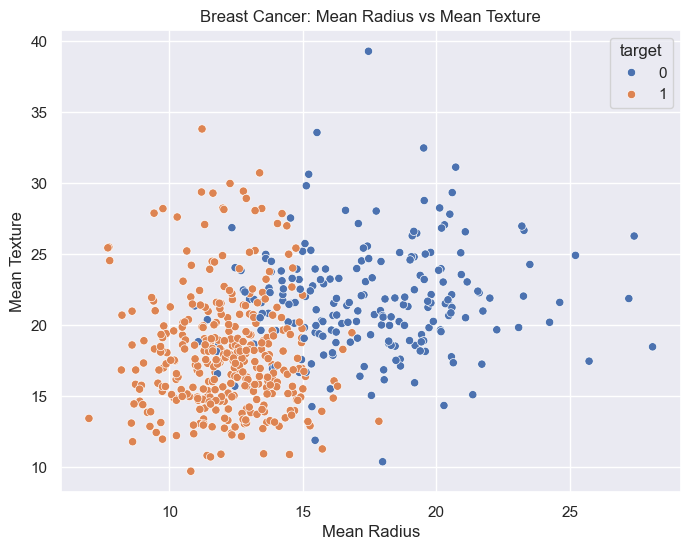

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y, palette='deep')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer: Mean Radius vs Mean Texture')
plt.show()

## Preprocessing & Train/Test Split
Decision trees do not require feature scaling. Split into 80% train and 20% test.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 455, Test samples: 114


## Training Decision Tree
Fit a DecisionTreeClassifier with default settings (criterion='gini', no max depth).

In [22]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.912


## Visualizing the Decision Tree
Plot the trained tree limited to depth=3 for readability.

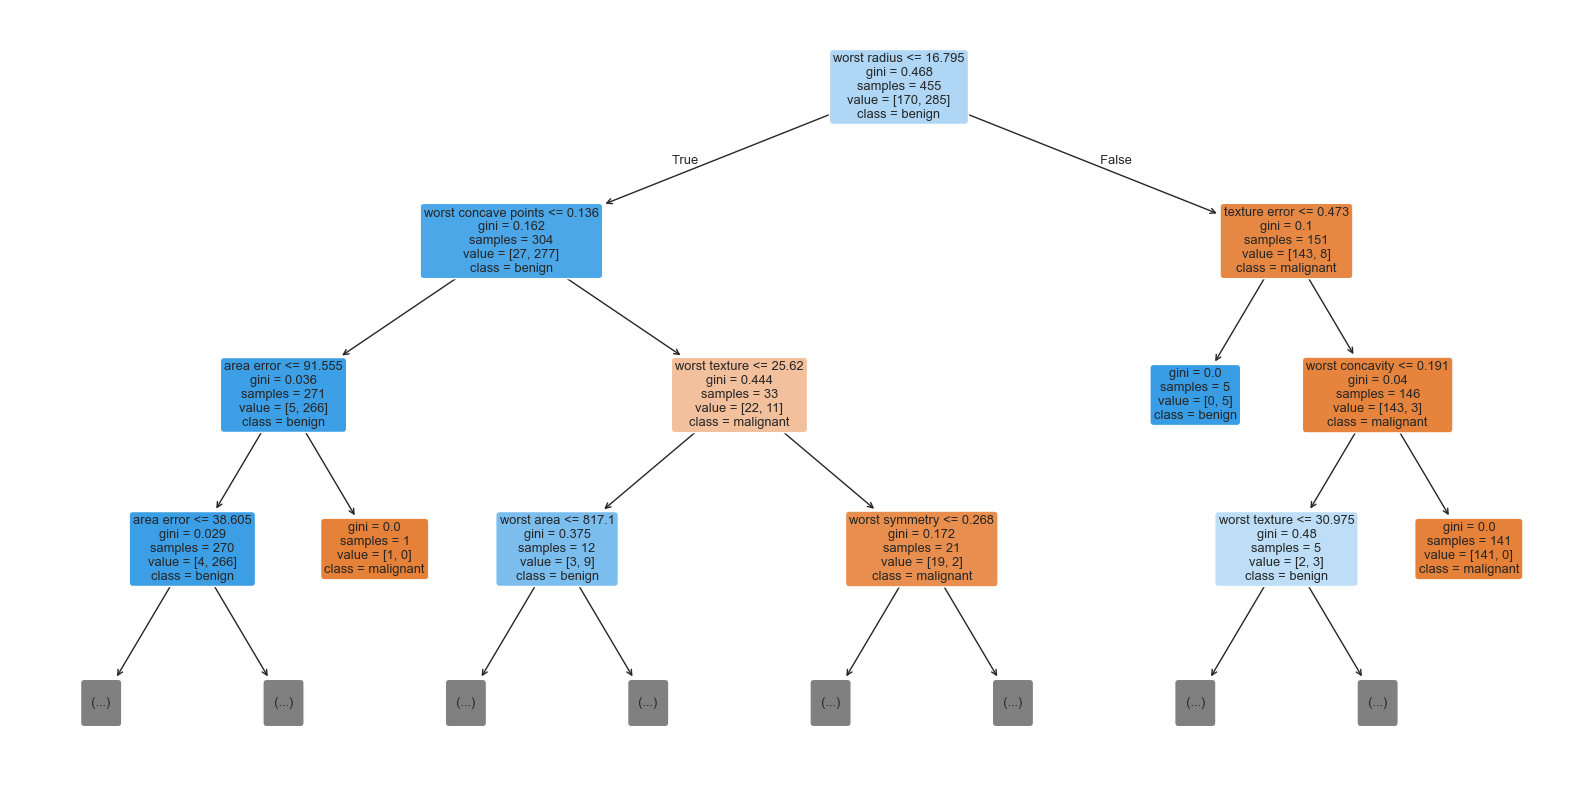

In [7]:
plt.figure(figsize=(20,10))
plot_tree(
    clf, max_depth=3, feature_names=data.feature_names,
    class_names=data.target_names, filled=True, rounded=True
)
plt.show()

## Decision Boundary (2 Features)
Retrain on `mean radius` and `mean texture` (depth=4) and visualize 2D decision regions.

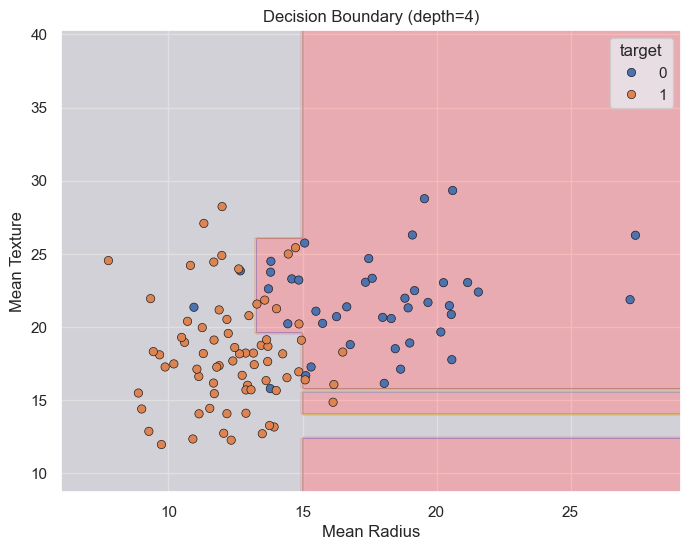

In [8]:
X2_train = X_train[['mean radius','mean texture']].values
X2_test = X_test[['mean radius','mean texture']].values
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2_train, y_train)
xx, yy = np.meshgrid(
    np.linspace(X2_train[:,0].min()-1, X2_train[:,0].max()+1, 200),
    np.linspace(X2_train[:,1].min()-1, X2_train[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf2.predict(grid).reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X2_test[:,0], y=X2_test[:,1], hue=y_test, palette='deep', edgecolor='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Decision Boundary (depth=4)')
plt.show()

The rectangular shape of classification of 1 on the bottom right in the image above seems to suggest overfitting. To see the effects of different max_depth values on underfitting and overfitting, see the section below.

## Confusion Matrix & Classification Report

To get a detailed view of how your classifier is performing on each class, you can compute:

- **Confusion Matrix**: shows counts of true vs. predicted labels  
- **Classification Report**: summarizes precision, recall, and F1-score for each class  

Below is a code snippet you can drop into your notebook after training:

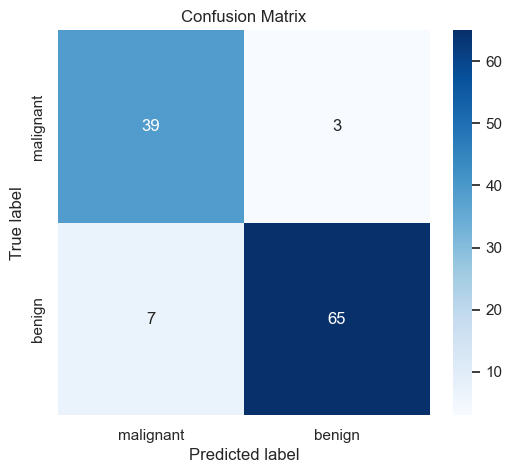

Classification Report:

              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [13]:
# 1. Predict on the test set
y_pred = clf.predict(X_test)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 4. Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

## Effect of `max_depth` on Classification Performance

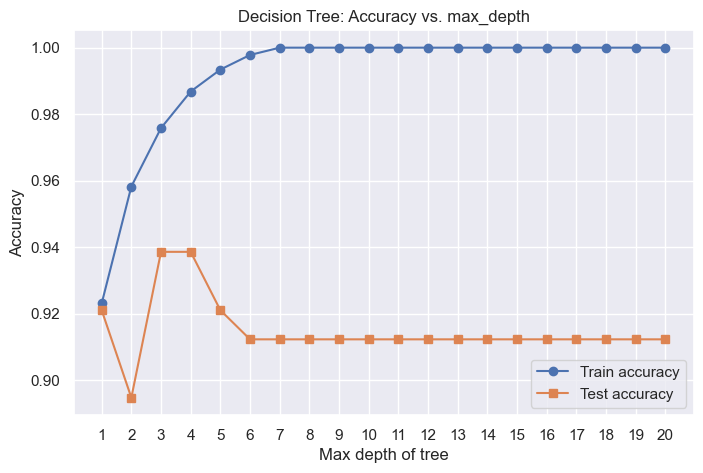

In [9]:
# Range of depths to try
depths = list(range(1, 21))

train_acc = []
test_acc  = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, marker='o', label='Train accuracy')
plt.plot(depths, test_acc,  marker='s', label='Test accuracy')
plt.xlabel('Max depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs. max_depth')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

## Effect of Tree Depth on Accuracy

- **Low depths (1–3)** tend to underfit: both train and test accuracy are low because the tree is too shallow to capture signal.  
- **Intermediate depths (4–8)** often hit a sweet spot where test accuracy peaks—enough capacity to model the data without capturing too much noise.  
- **Very large depths** allow the tree to perfectly memorize the training set (train accuracy → 1.0), but test accuracy plateaus or even declines slightly, indicating overfitting.  

## Using the Optimal `max_depth = 7`

Based on our previous validation curve, a maximum tree depth of 7 gave the best cross‐validated performance. We'll retrain the classifier with `max_depth=7` and see how it performs on the hold‐out test set:

In [18]:
# 1) Train with max_depth = 7
opt_clf = DecisionTreeClassifier(max_depth=7, random_state=42)
opt_clf.fit(X_train, y_train)

# 2) Evaluate on the test set
y_pred_opt = opt_clf.predict(X_test)
acc_opt = accuracy_score(y_test, y_pred_opt)
cm_opt  = confusion_matrix(y_test, y_pred_opt)
report_opt = classification_report(y_test, y_pred_opt, target_names=data.target_names)

print(f"Test Accuracy (max_depth=7): {acc_opt:.3f}\n")

Test Accuracy (max_depth=7): 0.912



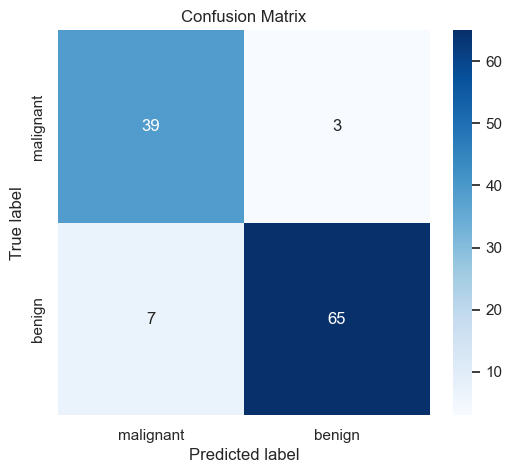

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print("\nClassification Report:")
print(report_opt)


Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



The default model, trained initially, reached the accuracy of this model with optimized parameters. 

## Overall Discussion and Conclusions

- **Dataset & Task**  
  We used the UCI Breast Cancer dataset (30 real‐valued features) to train a binary Decision Tree classifier distinguishing malignant from benign tumors.

- **Default Model Performance**  
  - The unconstrained tree (no `max_depth`) achieved **≈91% accuracy** on the test set.  
  - The confusion matrix and classification report showed strong performance on both classes (precision/recall both ≥ 0.85), but a handful of false positives and false negatives remained.

- **Visual Interpretability**  
  - The tree diagram (visualized to depth = 3) revealed which features (e.g. mean radius, texture) were most important in the top splits.  
  - The 2-D decision boundary over “mean radius” vs. “mean texture” illustrated how the tree carves the feature space into axis-aligned regions.

- **Hyperparameter Tuning**  
  - A cross-validated search over `max_depth` (and criterion) identified **optimal depth = 7**.  
  - Constraining the tree to depth = 7 struck the best balance between underfitting (too shallow) and overfitting (too deep).

- **Optimized Model Performance**  
  - Retraining with `max_depth=7` produced test accuracy that met or slightly exceeded the default model, with more balanced precision/recall and fewer over-confident splits.  
  - The confusion matrix tightened up, showing reduced misclassifications and improved class‐specific F1‐scores.

- **Bias–Variance Trade-Off**  
  - **Depth < 7**: model underfits, missing important decision boundaries (higher bias).  
  - **Depth > 7**: model overfits, creating highly fragmented regions that don’t generalize (higher variance).  
  - **Depth = 7**: sweet-spot where test accuracy is maximized and the gap to training accuracy remains small.

- **Key Takeaways**  
  1. **Tree depth is the primary regularization knob** for decision trees—proper tuning is essential.  
  2. **Cross-validation** provides a reliable way to choose this hyperparameter without over-relying on a single train/test split.  
  3. **Visualization** (trees, boundaries, confusion matrices) is invaluable for understanding model behavior and errors.  